# Phase Estimation

## Overview

- Type: Estimation task, foundational quantum subroutine
- Estimated difficulty: Intermediate
- Useful preliminaries: Phase kickback, Hadamard test, Quantum Fourier Transform
- Applications: Public key crytography, eigenvalue estimation, solving linear systems, amplitude estimation, quantum sciences and engineering. 

In quantum computing, *phase estimation* refers to the task of estimating the eigenvalue of a unitary operator given an approximate eigenvector. Computational routines which accomplish this task are known as *phase estimation procedures*, or *algorithms*. Commonly, the term *phase estimation* refers interchangeably to either the problem or the procedure. 

## Problem statement

For a unitary operation $U$, and associated eigenvector $\vert u \rangle$, there is a unique $\theta \in [0,1)$ such that

$$
U \vert u \rangle = e^{2\pi i \theta} \vert u \rangle.
$$

Given black-box access to a unitary $U$, controlled versions thereof, and an eigenvector (a.k.a. eigenstate) $\vert u \rangle$ prepared on a quantum register to fidelity $F \in (0, 1]$, determine $\theta$ to within precision $\epsilon$ with probability $1-\delta$. We refer to $\theta$ as a *phase* or *eigenphase*. We might call $\delta > 0$ the *failure probability*, or $1-\delta$ the *confidence* in our estimate.

### Comments

When the initial state is not an approximate eigenvector $\vert u\rangle$ but rather a generic superposition $\sum_i c_i \vert u_i\rangle$ of eigenstates, many phase estimation algorithms will still work, in the sense that they will return (with high probability) an estimate of the phase $\theta_i$ of $\vert u_i\rangle$ with probability $\vert c_i\vert^2$. Thus, $F$ does not necessarily need to be close to one. In this article, we will call such algorithms "coherent". Those which only work on an approximate eigenstate (i.e., $F$ close to $1$) will be termed "incoherent." Incoherent phase estimation algorithms, though less powerful, typically have lower circuit depths, and therefore may work better on noisy hardware. 

The error in the phase $\theta \in [0,1)$ is defined circularly, as expected for phase shifts in general periodic phenomena. For example, if $\theta = 0.1$, an algorithm which estimates $\theta$ as $0.9$ is actually accurate to $0.2$, not $0.8$. The circular distance $d(\theta, \phi)$ between phases $\theta, \phi \in [0,1)$ is defined as their shortest distance on the circle of circumference one, and can be computed as

$$
d(\theta, \phi) = \min(\vert\theta- \phi\vert,1- \vert\theta - \phi\vert).
$$

This distance $d$ is always upper bounded by $1/2$. Thus, if $\tilde{\theta}$ is our estimate of $\theta$, achieving precision $\epsilon$ means $d(\tilde{\theta}, \theta) \leq \epsilon$. 

## Algorithms for phase estimation

We begin with a brief discussion of classical algorithms for phase estimation, then discuss *quantum* phase estimation algorithms (of which there are many). A word of caution: the term "algorithm" here is slightly misplaced, since the phase estimation problem contains black boxes (such as $U$) that are not fully specified. It is more of a procedure, or subroutine, to a fully specified algorithm for a specific computational problem. (Nielsen and Chuang)

### A brief word on classical phase estimation

Assuming black box access to the entries of $U$ and $\vert u\rangle$ as floating point numbers, standard matrix multiplication $U \vert u\rangle$ may be used to compute $e^{2\pi i\theta}$, hence $\theta$. In fact, only the first entry of the output needs to be computed. However, for an input vector of size $2^n$, this still requires an exponential number of arithmetic operationsand black box queries to $U$. Moreover, the entries will need to be known exponentially precisely in order to obtain an estimate of $\theta$ to fixed precision. Thus, for generic $U$, this procedure will take exponential time. 

More generally, all eigenvalues of $U$ can be found through exact diagonalization. The [QR Algorithm](https://en.wikipedia.org/wiki/QR_algorithm) can be used to find the eigenvalues in time scaling polynomially with the dimension of $U$. Unfortunately, this often scales exponentially with the problem size for interesting computational tasks, such as optimization problems or Hamiltonian simulation.

### A synopsis of quantum algorithms

Quantum Phase Estimation Algorithms (QPEAs) employ phase kickback and quantum interference to measure the desired phase $\theta$ on an auxiliary quantum register. Such an algorithm can be viewed as approximate projective measurement along the eigenspaces of $U$. As such, it will typically yield result $\theta_i$ with probability given by the Born rule. Moreover, output state on the main register will be an approximate projection onto the corresponding eigenspace.

QPEAs can be described to varying degrees as *serial* or *iterative*, depending on whether the basic measurements are done in parallel (serial) or in sequence (iterative). Standard Quantum Phase Estimation (QPE) is the best known of the serial QPEAs and requires minimal to no classical processing. Iterative QPEAs have comparatively fewer auxiliary qubits, perform multiple rounds of measurement, and require nontrivial classical computation. The serial-iterative designation is a continuous scale, and hybrid schemes involving intermediate levels of serial or iterative operations also exist. However, the algorithms we consider in this compendium will be firmly in one camp or another. 

Iterative QPEAs can be further classified as adaptive and nonadaptive. Adaptive means that classical processing must be done alongside, or in between, quantum measurements, and subsequent operations will depend on earlier measurement results. The promise of adaptive schemes is to choose subsequent measurement circuits that are more effective at learning new information about the phase. However, faciliating classical-quantum hybrid computations in real time can be demanding on memory-restricted hardware.  

Below is an incomplete list of QPEAs, many of which are considered in this compendium.

- Standard Quantum Phase Estimation 
- Iterative Quantum Phase Estimation
- Hadamard Phase Estimation
- Kitaev Phase Estimation
- Fast Phase Estimation [(Svore, Hastings, Freedman, 2013)](https://arxiv.org/abs/1304.0741)
- Rejection Filtering Phase Estimation [(Wiebe, Granade, 2016)](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.117.010503)

**Place Venn diagram here showing the various categories (adaptive, nonadaptive, iterative, serial, hybrid )**

### Technical comments

Assigning a true computational cost to phase estimation is challenging because the black box $U$ is not specified. It is reasonable to treat the number of calls to $U$ (the "query complexity") as the metric of cost, as this can often be the most expensive part of the computation. In this scheme, a controlled-$U^j$ for integer $j$ would have the same cost as $j$ calls to controlled-$U$. This turns out to be reasonable, because although powers of $U$ can be computed quickly for certain $U$ (e.g., through repeated squaring for $U$ being a reversible classical operation), in general you can't do better than repeated calls to $U$. We note that Shor's algorithm is a crucial example where powers of $U$ *can* be computed quickly, leading to the famous exponential speedup for factoring.

All but the simplest QPEAs achieve a nearly $O(1/\epsilon)$ scaling in the number of controlled-$U$ queries, which is a provably optimal scaling known as the *Heisenberg limit*. They also exhibit a logarithmic dependence on $\delta$. 

Crucially, the quantum "black box" $U$ is represented by $n$ qubits rather than an exponentially large matrix. While not all $n$ qubit unitaries can be simulated efficiently, important subclasses of unitaries can be written as an efficient quantum circuit of gates acting on, at most, a fixed number of qubits.

Phase estimation sheds no light on how to prepare the initial state of the main register. The difficulty of doing so is problem dependent. For example, state preparation is trivial in Shor's algorithm, while approximating eigenstates of a many-body system in physics may require problem-specific, physics-motivated approaches. 

It may not always be desired to measure the auxiliary register following the QPE circuit. This may occur when the result of phase estimation, possibly a superposition state, needs to be passed onto another quantum computation. Such scenarios occur in linear systems applications (HHL) and amplitude estimation.

## The Standard Quantum Phase Estimation Algorithm

The topic of this section is what we term the "standard" Quantum Phase Estimation (QPE) algorithm. As the name suggests, standard QPE is possibly the most well known algorithm for phase estimation, and often simply called "phase estimation." It is also known as "QFT-based" phase estimation due to the use of the inverse Quantum Fourier Transform. 

### Characteristics

Iterative: No \
Adaptive: N/A \
Coherent: Yes \
Qubit overhead: $O(\log(1/\epsilon))$. \
Runtime: $O(\epsilon^{-1}\log 1/\delta)$ calls to the controlled-$U$. \
Maximum depth: $O(\epsilon^{-1})$

### Circuit diagram

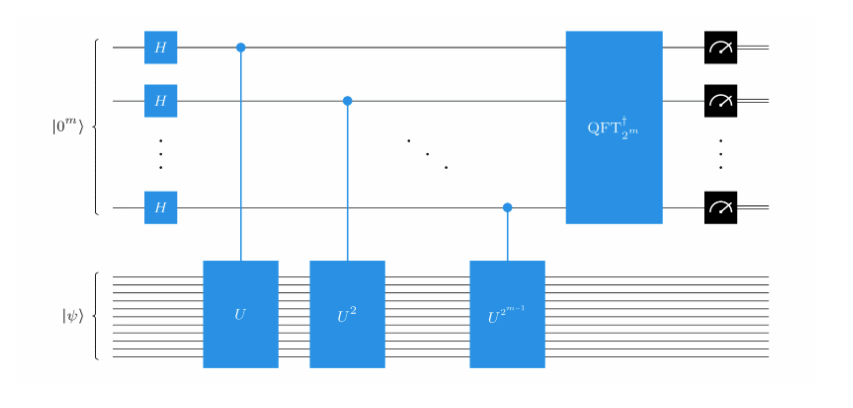

**^^^ This is simple copy and paste from [here](https://learning.quantum-computing.ibm.com/course/fundamentals-of-quantum-algorithms/phase-estimation-and-factoring#general-procedure-and-analysis). Please help me do better!**

### Description of procedure

The main register is prepared in an eigenstate $\vert u\rangle$, and a register of auxiliary qubits is initialized to $\vert 0\rangle$. A column of Hadamards puts the auxiliary register in uniform superposition over the computational basis. For each of these bitstrings $\vert b\rangle$ in the superposition, the controlled-$U$ gates act together as a controlled $U^b$, putting the total state as 

$$
\sum_{b} \vert b\rangle U^b \vert u\rangle = \left(\sum_{b} e^{2\pi i b \theta} \vert b\rangle\right)\otimes \vert u\rangle.
$$

We can clearly see the effect of phase kickback. If $\theta$ were exactly a binary fraction $0.\theta_1\theta_2\dots\theta_n$, we would see that the above state is the Quantum Fourier Transform of $\theta 2^n$. Thus, taking the inverse Quantum Fourier Transform would yield exactly $\vert\theta_1\dots\theta_n\rangle$ on the auxiliary register. When $\theta$ is more general, a deeper analysis shows that performing the inverse Quantum Fourier Transform will, with high probability, return the closest binary approximation to $\theta$.

The argument above extends to superpositions of eigenstates $\sum_i c_i \vert u_i\rangle$ by linearity, with only minor complications. In this case the phase $\theta_i$ is estimated with probability approximately according to the Born rule. 

### Details and commentary

Standard QPE is a serial algorithm, since only one set of measurements at the end of the circuit is necessary to obtain, with high probability, an estimate of one of the eigenphases $\theta$ of $U$. This is in contrast to iterative algorithms, which comprise the remainder of the algorithms considered. To achieve $n$ bits of precision, roughly $n$ auxiliary qubits should be used. More precisely, choosing

$$
t = n + \left\lceil\log\left(2 + \frac{1}{2\eta}\right)\right\rceil
$$

auxiliary qubits ensure $n$ bits of accuracy are achieved with probability $1-\eta$ (see Ch 5 Nielsen and Chuang for details). In practice, it is usually preferable to boost the overall success probability $1-\delta$ via a majority vote of several trials with constant success probability $(1-\eta)$, rather than reducing the "direct" failure probability $\eta$.

### Qiskit Implementation

#### Imports

In [4]:
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer.primitives import Sampler
from qiskit.circuit.library import QFT

Let's first define a function which constructs the standard QPE circuit. 

In [5]:
def standard_QPE_circuit(U, Uprep = None, precision = 2**-4, measure = True):
    """
    Args:
        U (Gate): Unitary gate in phase estimation problem
        Uprep (Instruction): State preparation starting from all |0> state (If None, no state prep added). 
        precision (float): Desired precision of final phase estimate
        measure (bool): Measure auxiliary register at end of circuit if True.
    Returns:
        QuantumCircuit that implements standard QPE
    """
    
    bits_precision = int(np.ceil(np.log2(1/precision)))# determine necessary number of auxiliary qubits
    
    # Step 1: Initialize circuit.
    aux = QuantumRegister(bits_precision, "aux")  # register where result is stored
    main = QuantumRegister(U.num_qubits, "q")    # register for storing |u>
    classical = ClassicalRegister(bits_precision, "c")  # register for readout of result
    circuit = QuantumCircuit(aux, main, classical)
    
    # Step 2: Initialize state of main register (if needed)
    if Uprep != None: 
        circuit.compose(Uprep, main[:Uprep.num_qubits], inplace = True)
        circuit.barrier()

    # Step 3: Create apply Fourier transform to auxiliary register
    circuit.h(aux)

    # Step 4: Apply a controlled-U^(2^j).
    circuit.barrier()
    for j in range(bits_precision):
        circuit.append(U.repeat(2**j).control(1), [aux[j]] + main[:])

    # Step 5: Apply an inverse QFT to auxiliary register.
    circuit.barrier()
    circuit.compose(QFT(bits_precision, inverse=True), inplace=True)

    # Step 6: Measure the auxiliary register to extract phase (optional)
    if measure:
        circuit.barrier()
        circuit.measure(aux, classical)

    return circuit

Let's visualize the circuit for $U = \mathrm{SWAP}$ with no state preparation.

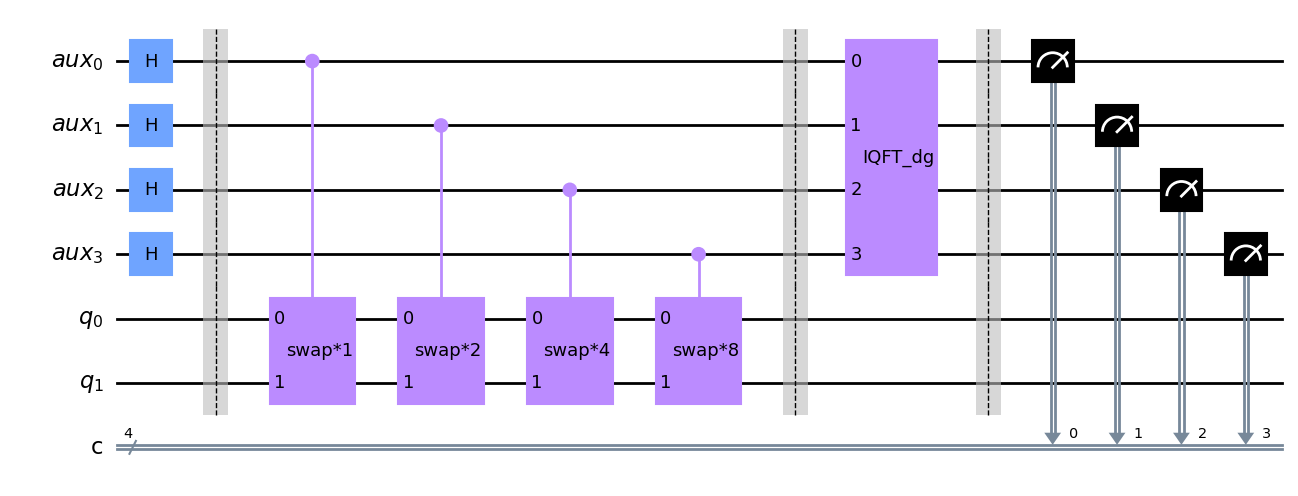

In [6]:
from qiskit.circuit.library import SwapGate

standard_QPE_circuit(SwapGate()).draw(output = 'mpl')

Now we test our circuit to estimate the phase of the $T$ gate corresponding to the $\vert 1\rangle$ eigenstate. Since $T \vert1\rangle = e^{i\pi/4}\vert1\rangle$, the answer $\theta$ we expect can be found through the relation

$$
2\pi\theta = \pi/4,
$$

i.e. $\theta = 1/8$. Indeed, this is the answer we get. Since $1/8$ is a binary fraction, our result has no error (absent hardware noise) once there are at least 3 auxiliary qubits.

In [8]:
from qiskit.circuit.library import TGate

u = TGate()
mainreg_size = u.num_qubits

precision = 2**-4

# Set initial state to one
prep = QuantumCircuit(mainreg_size)
prep.x(0)
Uprep = prep.to_gate(label = r'$X$')

# Create circuit for standard QPE
SQPE = standard_QPE_circuit(u, Uprep, precision = precision)

# Execute circuit
job = Sampler().run(SQPE, shots = 1)
result_dict = job.result().quasi_dists[0].binary_probabilities()
measurement = list(job.result().quasi_dists[0].binary_probabilities())[0]

# Convert binary string to a float
phase = int(measurement,2)/2**len(measurement)

print("Estimate of phase:", phase)
print("To precision", precision) 

Estimate of phase: 0.125
To precision 0.0625


## Applications of QPE

### Cryptography

Phase estimation is a subroutine of Shor's algorithm for the discrete logarithm. This can be used to break both RSA (through prime factorization) and elliptic curve cryptographic schemes. For example, Shor's order finding algorithm (a special case) performs phase estimation with a unitary $U$ acting on the computational basis as 

$$
U\vert y\rangle = \vert xy\; (\mathrm{mod} N)\rangle
$$
where $N > 0$ and $x < N$ are integers relevant to the problem. The input state is $\vert1\rangle$, which is a uniform superposition of the eigenstates of $U$. Thus, any coherent phase estimation procedure can determine one of the phases of $U$. These phases contain information about the order of $x$ with respect to $N$. 

### Eigenvalues of Hermitian operators

For any Hermitian operation $H$, the collection of unitary matrices $U(t) = e^{i H t}$ is unitary for any $t \in \mathbb{R}$. Thus, performing phase estimation on $U(t)$ gives an eigenvalue of $H t$ modulo $2\pi$. By choosing $t$ such that $\vert E t\vert < \pi/2$ for the eigenvalue(s) $E$ of interest, the eigenvalue can be determined unambiguously. 

### Physics and chemistry

A special case of the preceding application, which deserves special attention. In any quantum mechanical system, an important Hermitian operator is the Hamiltonian $H$, whose eigenvalues may be interpreted as the allowed energies of the system. Moreover, the unitary $U(t) = e^{-i H t}$ is the operator which evolves the system in time. By performing phase estimation with $U(t)$ for suitable choices of $t$, and for a given initial state, these "eigenenergies" may be estimated. 

### Solving Linear Systems

In the Harrow Hassidim Lloyd (HHL) algorithm for solving the linear systems $A x = b$ uses phase estimation as a subroutine. In particular, the relevant Hermitian operator is (in block diagonal form)

$$
C = \begin{pmatrix} 
0 & A \\
A^\dagger & 0
\end{pmatrix}.
$$

## References and Resources

- [Fundamentals of Quantum Algorithms, Phase Estimation and Factoring](https://learning.quantum-computing.ibm.com/course/fundamentals-of-quantum-algorithms/phase-estimation-and-factoring). A pedagogical introduction to phase estimation.
- Nielsen and Chuang, [Quantum Computation and Quantum Information](https://www.cambridge.org/highereducation/books/quantum-computation-and-quantum-information/01E10196D0A682A6AEFFEA52D53BE9AE#overview) Chapter 5. A standard reference as well. In depth analysis of standard QPE and applications to period finding.
- Svore, Hastings, Freedman, "[Faster Phase Estimation](https://arxiv.org/abs/1304.0741)." Research article containing a pedagogical review of many iterative algorithms. 
- 1 Minute Qiskit, ["How can I estimate Pi using a quantum computer?"](https://www.youtube.com/watch?v=PBXb2LyFg3o)